In [57]:
import numpy as np
from random import uniform
import matplotlib.pyplot as plt
from numpy.linalg import eig, inv, det
import pandas as pd

In [58]:
def gamble(initial_chips=10, win_probability=0.4, target_winnings=20, trials=10000):
    results = np.zeros(trials)  # Track wins (1) or losses (0) for each trial

    for i in range(trials):
        chips = initial_chips
        while chips > 0:  # Play until chips run out or target is reached
            if uniform(0, 1) <= win_probability:  # Winning game
                chips += 1
            else:  # Losing game
                chips -= 1

            if chips == target_winnings:  # Check if target winnings are reached
                results[i] = 1
                break

    return results

# Simulation
num_trials = 500000
win_loss_results = gamble(trials=num_trials)
proportion_of_wins = np.mean(win_loss_results)

print('Proportion of winning gambles:', proportion_of_wins)

Proportion of winning gambles: 0.017172


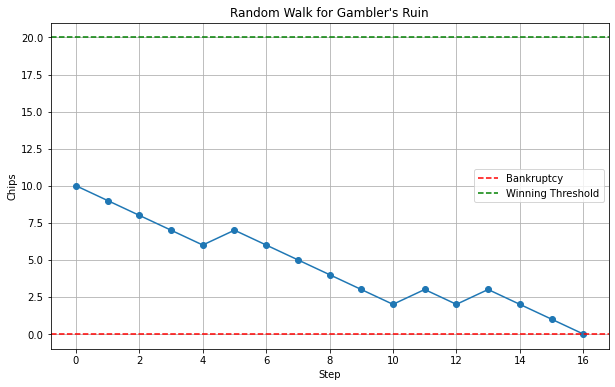

In [59]:
def random_walk(init=10, p=0.4, win=20):
    steps = [init]  # Initial chips
    chips = init
    while chips > 0 and chips < win:
        if np.random.uniform(0, 1) > p:  # losing game
            chips -= 1
        else:  # winning game
            chips += 1
        steps.append(chips)
    return steps

# Simulate a random walk
random_walk_data = random_walk()

# Plot the random walk
plt.figure(figsize=(10, 6))
plt.plot(random_walk_data, marker='o')
plt.axhline(0, color='red', linestyle='--', label="Bankruptcy")
plt.axhline(20, color='green', linestyle='--', label="Winning Threshold")
plt.title("Random Walk for Gambler's Ruin")
plt.xlabel("Step")
plt.ylabel("Chips")
plt.legend()
plt.grid(True)
plt.show()

In [60]:
def PforG(p=0.4, N=20):
    q = 1 - p
    P = np.diag(q*np.ones(N), k=-1) + np.diag(p*np.ones(N), k=1) 
    P[0, :] = 0
    P[0, 0] = 1
    P[N, :] = 0
    P[N, N] = 1
    return P

PforG(p=0.4)

array([[1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.6, 0. , 0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.6, 0. , 0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.6, 0. , 0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.6, 0. , 0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.6, 0. , 0.4, 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0.4, 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0.4, 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0

In [61]:
P = PforG(p=0.4)
ew, ev = eig(P)
ew

array([-9.67732984e-01, -9.31841273e-01, -8.73004537e-01, -7.92671532e-01,
       -6.92820323e-01, -5.75909579e-01, -4.44818029e-01, -3.02773583e-01,
       -1.53273847e-01, -4.33433599e-17,  1.53273847e-01,  9.67732984e-01,
        9.31841273e-01,  8.73004537e-01,  7.92671532e-01,  6.92820323e-01,
        3.02773583e-01,  5.75909579e-01,  4.44818029e-01,  1.00000000e+00,
        1.00000000e+00])

In [62]:
def Gchances(p=0.4, N=20):
    P = PforG(p, N)
    ew, ev = eig(P)
    H = ev[:, abs(ew - 1) < 1e-15]
    M = np.array([H[0, :], H[-1, :]])
    c = inv(M) @ np.array([0, 1]) 
    return H @ c

In [63]:
h = Gchances(p=0.4)
h

array([0.00000000e+00, 1.50409562e-04, 3.76023906e-04, 7.14445421e-04,
       1.22207769e-03, 1.98352610e-03, 3.12569872e-03, 4.83895764e-03,
       7.40884602e-03, 1.12636786e-02, 1.70459275e-02, 2.57193007e-02,
       3.87293607e-02, 5.82444506e-02, 8.75170854e-02, 1.31426038e-01,
       1.97289466e-01, 2.96084609e-01, 4.44277323e-01, 6.66566394e-01,
       1.00000000e+00])

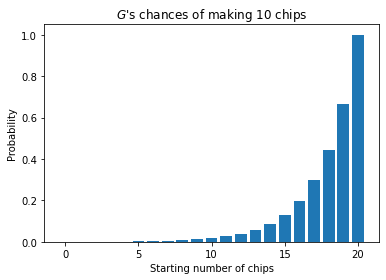

In [64]:
plt.bar(range(len(h)), h)
plt.title('$G$\'s chances of making 10 chips');
plt.xlabel('Starting number of chips'); plt.ylabel('Probability');

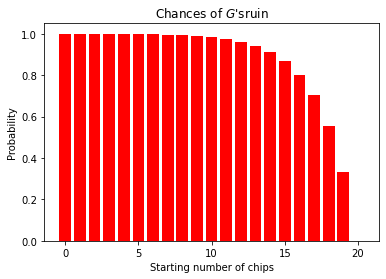

In [65]:
plt.bar(range(len(h)), 1-h, color='red')
plt.title('Chances of $G$\'sruin');
plt.xlabel('Starting number of chips'); plt.ylabel('Probability');

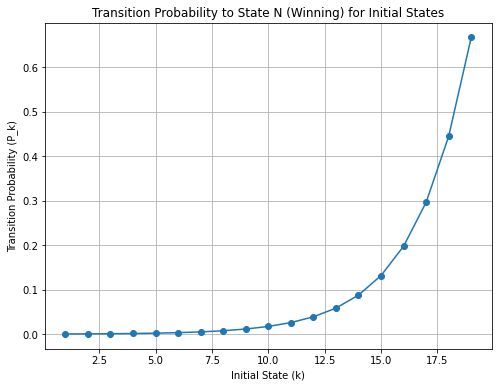

In [66]:
def transition_probability(k, N, p):
    q = 1 - p
    if p == q:  # Fair random walk case
        return k / N
    else:  # Biased random walk case
        return (1 - (q / p) ** k) / (1 - (q / p) ** N)

# Parameters
win = 20
p = 0.4
initial_states = range(1, win)  # All possible initial states (1 to win-1)

# Calculate transition probabilities for each initial state
transition_probabilities = [transition_probability(k, win, p) for k in initial_states]

# Plotting the transition probabilities
plt.figure(figsize=(8, 6))
plt.plot(initial_states, transition_probabilities, marker='o')
plt.title('Transition Probability to State N (Winning) for Initial States')
plt.xlabel('Initial State (k)')
plt.ylabel('Transition Probability (P_k)')
plt.grid(True)
plt.show()

In [67]:
specific_state = 10  # Example state

# Calculate the transition probability for the specific state
specific_transition_probability = transition_probability(specific_state, win, p)
specific_transition_probability

0.01704592745492986

In [68]:
initial_chips = 10
target_winnings = 20
win_probability = 0.4

In [69]:
num_trials = 500000
win_loss_results = gamble(
    initial_chips=initial_chips,
    win_probability=win_probability,
    target_winnings=target_winnings,
    trials=num_trials
)
numerical_probability = np.mean(win_loss_results)
analytical_probability = transition_probability(initial_chips, target_winnings, win_probability)

In [70]:
absolute_error = abs(numerical_probability - analytical_probability)
relative_error = absolute_error / analytical_probability

absolute_error, relative_error

(1.992745492986059e-05, 0.0011690449218764779)

In [71]:
def transition_probability(k, N, p):
    q = 1 - p
    if p == q:  # Fair random walk case
        return k / N
    else:  # Biased random walk case
        return (1 - (q / p) ** k) / (1 - (q / p) ** N)

def gamble(initial_chips, win_probability, target_winnings, trials):
    results = np.zeros(trials)  # Track wins (1) or losses (0) for each trial

    for i in range(trials):
        chips = initial_chips
        while chips > 0:  # Play until chips run out or target is reached
            if uniform(0, 1) <= win_probability:  # Winning game
                chips += 1
            else:  # Losing game
                chips -= 1

            if chips == target_winnings:  # Check if target winnings are reached
                results[i] = 1
                break

    return np.mean(results)

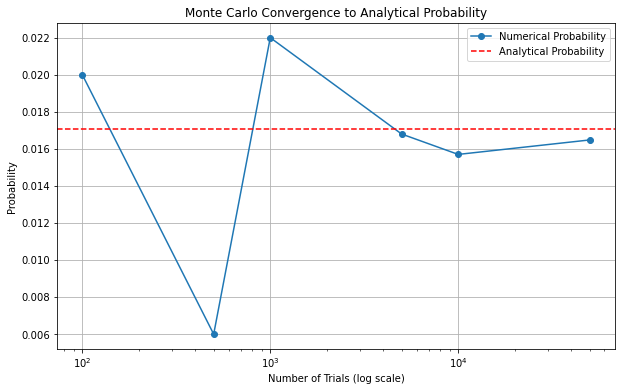

Trials: 100, Numerical Probability: 0.02000, Analytical Probability: 0.01705
Trials: 500, Numerical Probability: 0.00600, Analytical Probability: 0.01705
Trials: 1000, Numerical Probability: 0.02200, Analytical Probability: 0.01705
Trials: 5000, Numerical Probability: 0.01680, Analytical Probability: 0.01705
Trials: 10000, Numerical Probability: 0.01570, Analytical Probability: 0.01705
Trials: 50000, Numerical Probability: 0.01648, Analytical Probability: 0.01705


In [72]:
analytical_prob = transition_probability(initial_chips, target_winnings, win_probability)
trial_counts = [100, 500, 1000, 5000, 10000, 50000]
numerical_probs = []

for trials in trial_counts:
    numerical_prob = gamble(initial_chips, win_probability, target_winnings, trials)
    numerical_probs.append(numerical_prob)

# Plot convergence
plt.figure(figsize=(10, 6))
plt.plot(trial_counts, numerical_probs, marker='o', label='Numerical Probability')
plt.axhline(y=analytical_prob, color='r', linestyle='--', label='Analytical Probability')
plt.xscale('log')  # Use a logarithmic scale for trials
plt.xlabel('Number of Trials (log scale)')
plt.ylabel('Probability')
plt.title('Monte Carlo Convergence to Analytical Probability')
plt.legend()
plt.grid()
plt.show()

# Print results
for trials, num_prob in zip(trial_counts, numerical_probs):
    print(f"Trials: {trials}, Numerical Probability: {num_prob:.5f}, Analytical Probability: {analytical_prob:.5f}")

In [73]:
def transition_probability(k, N, p):
    """Calculate the probability of reaching state N starting from state k."""
    q = 1 - p
    if p == q:  # Fair random walk case
        return k / N
    else:  # Biased random walk case
        return (1 - (q / p) ** k) / (1 - (q / p) ** N)

def gamble(initial_chips, win_probability, target_winnings, trials):
    """Simulate the gambling game to find the winning probabilities."""
    results = np.zeros(trials)  # Track wins (1) or losses (0) for each trial

    for i in range(trials):
        chips = initial_chips
        while chips > 0:  # Play until chips run out or target is reached
            if uniform(0, 1) <= win_probability:  # Winning game
                chips += 1
            else:  # Losing game
                chips -= 1

            if chips == target_winnings:  # Check if target winnings are reached
                results[i] = 1
                break

    return np.mean(results)

In [74]:
test_cases = [
    {"initial_chips": 0, "win_probability": 0.4, "target_winnings": 20, "expected": 0.0},
    {"initial_chips": 5, "win_probability": 1.0, "target_winnings": 20, "expected": 1.0},
    {"initial_chips": 5, "win_probability": 0.0, "target_winnings": 20, "expected": 0.0},
]
results = []
for case in test_cases:
    num_trials = 10000
    numerical_result = gamble(
        initial_chips=case["initial_chips"],
        win_probability=case["win_probability"],
        target_winnings=case["target_winnings"],
        trials=num_trials,
    )
    results.append({
        "Initial Chips": case["initial_chips"],
        "Win Probability": case["win_probability"],
        "Target Winnings": case["target_winnings"],
        "Numerical Probability": round(numerical_result, 4),
        "Expected Probability": case["expected"],
        "Pass": abs(numerical_result - case["expected"]) < 0.01
    })

In [75]:
results

[{'Initial Chips': 0,
  'Win Probability': 0.4,
  'Target Winnings': 20,
  'Numerical Probability': 0.0,
  'Expected Probability': 0.0,
  'Pass': True},
 {'Initial Chips': 5,
  'Win Probability': 1.0,
  'Target Winnings': 20,
  'Numerical Probability': 1.0,
  'Expected Probability': 1.0,
  'Pass': True},
 {'Initial Chips': 5,
  'Win Probability': 0.0,
  'Target Winnings': 20,
  'Numerical Probability': 0.0,
  'Expected Probability': 0.0,
  'Pass': True}]